In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt

In [2]:
dataset = load_iris()

In [3]:
iris_df = pd.DataFrame(data=dataset["data"], columns=dataset["feature_names"])

In [4]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
petal_only = iris_df[["petal length (cm)", "petal width (cm)"]] 

In [6]:
petal_only

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [7]:
target_df = pd.DataFrame(data=dataset["target"], columns= ["target"])

In [8]:
target_df

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(petal_only, target_df, test_size=0.3, shuffle=True, random_state=42)

In [10]:
X_train

,petal length (cm),petal width (cm)
81,3.7,1.0
133,5.1,1.5
137,5.5,1.8
75,4.4,1.4
109,6.1,2.5
...,...,...
71,4.0,1.3
106,4.5,1.7
14,1.2,0.2
92,4.0,1.2


In [11]:
X_test

,petal length (cm),petal width (cm)
73,4.7,1.2
18,1.7,0.3
118,6.9,2.3
78,4.5,1.5
76,4.8,1.4
31,1.5,0.4
64,3.6,1.3
141,5.1,2.3
68,4.5,1.5
82,3.9,1.2


In [12]:
y_train

,target
81,1
133,2
137,2
75,1
109,2
...,...
71,1
106,2
14,0
92,1


In [13]:
y_test

,target
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
max_depth = 3

In [16]:
clf = DecisionTreeClassifier(max_depth=max_depth)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
from sklearn.tree import plot_tree

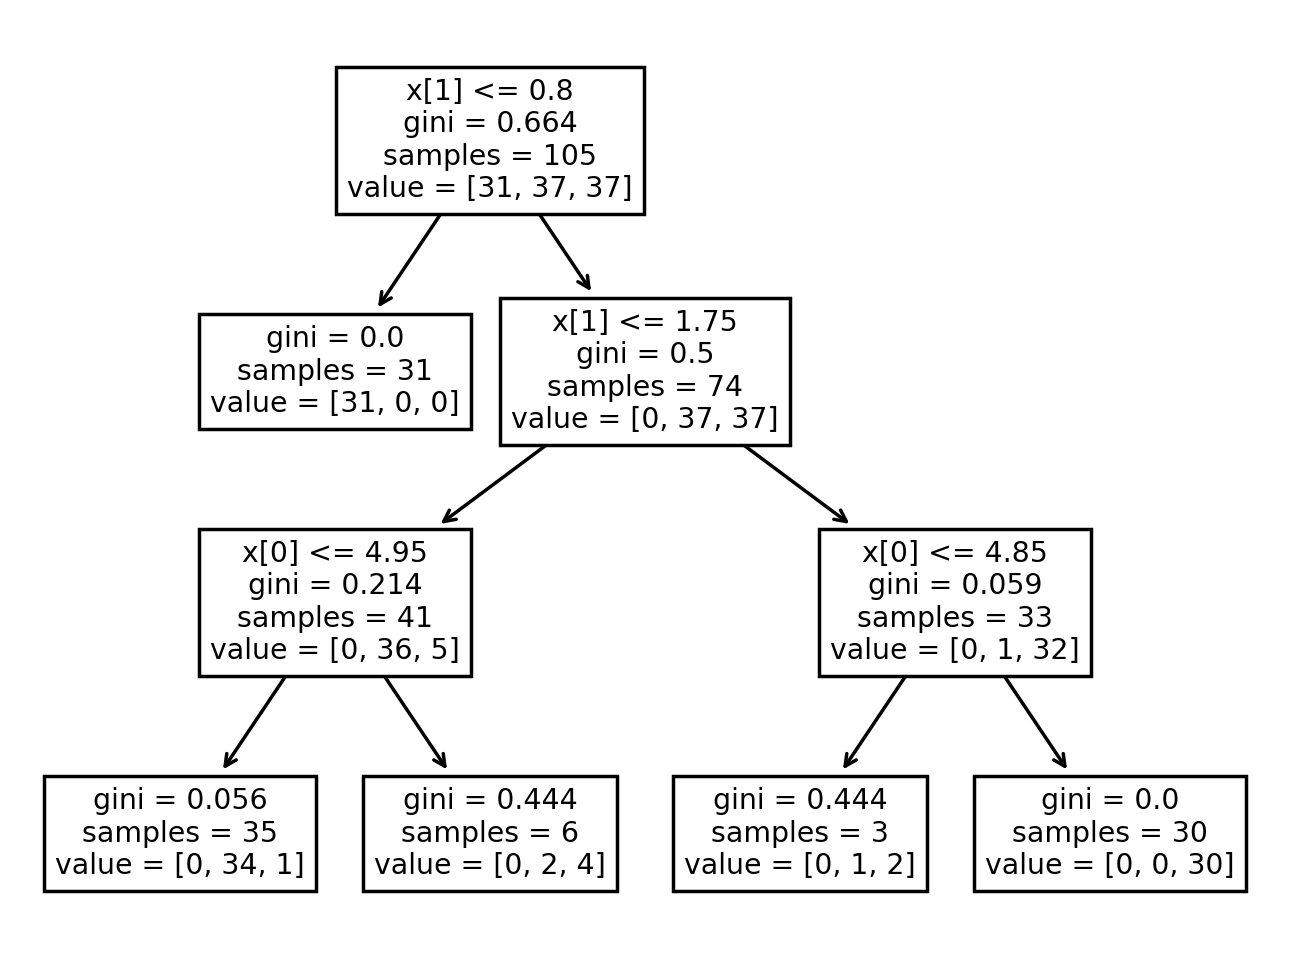

In [18]:
plt.figure(dpi=250)
plot_tree(clf)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
train_score = accuracy_score(y_train, clf.predict(X_train))
train_score

0.9619047619047619

In [21]:
test_score = accuracy_score(y_test, clf.predict(X_test))
test_score

1.0

In [64]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, mesh=0.05):
    
    x = np.arange(0, 8, 0.05)#-5~5の整数を用意
    y = np.arange(0, 4, 0.05)#上と同じ
    X, Y = np.meshgrid(x, y)#格子点座標の作成
    #②各点ごとの値を用意
    data = clf.predict(np.concatenate([np.reshape(X,(-1,1)), np.reshape(Y,(-1,1))], 1))#格子点ごとのデータを作成
    #③等高線を描画

    fig = plt.figure(figsize=(5,4), dpi=200, tight_layout=True)
    ax = fig.add_subplot(111)
    custom_cmap = ListedColormap(['red', 'blue', "green"])
    ax.contourf(X, Y, np.reshape(data, X.shape), cmap=custom_cmap, alpha=0.2)
    
    return fig, ax

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


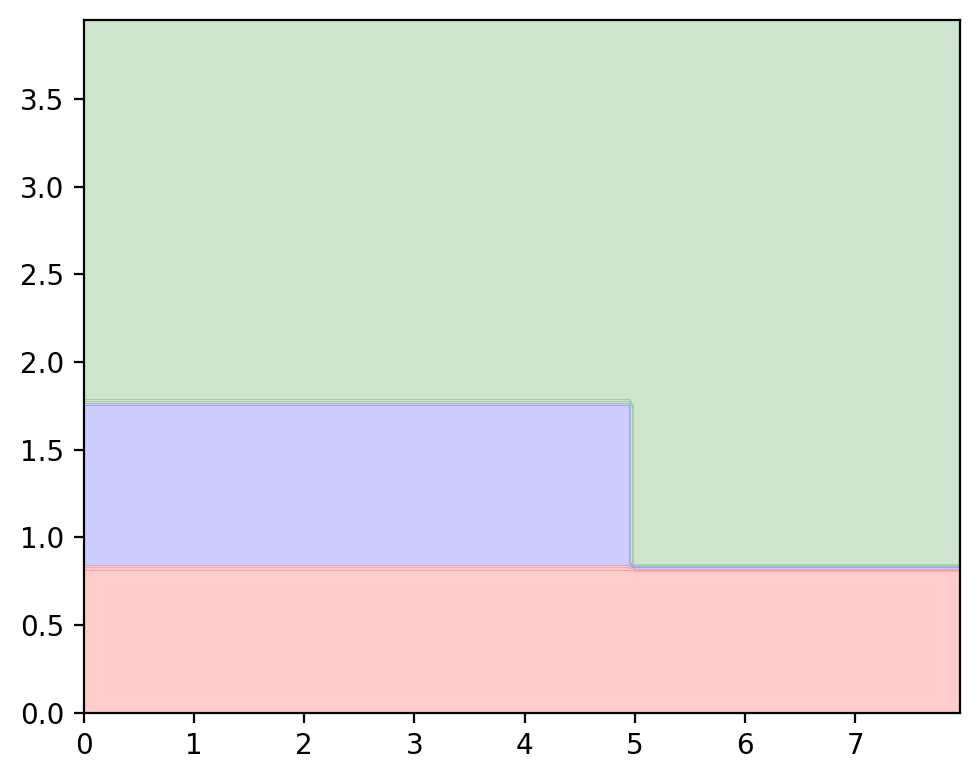

In [65]:
a, b = plot_decision_boundary(clf, mesh=0.1)

In [24]:
b.scatter(petal_only["petal length (cm)"], petal_only["petal width (cm)"])
a.show()

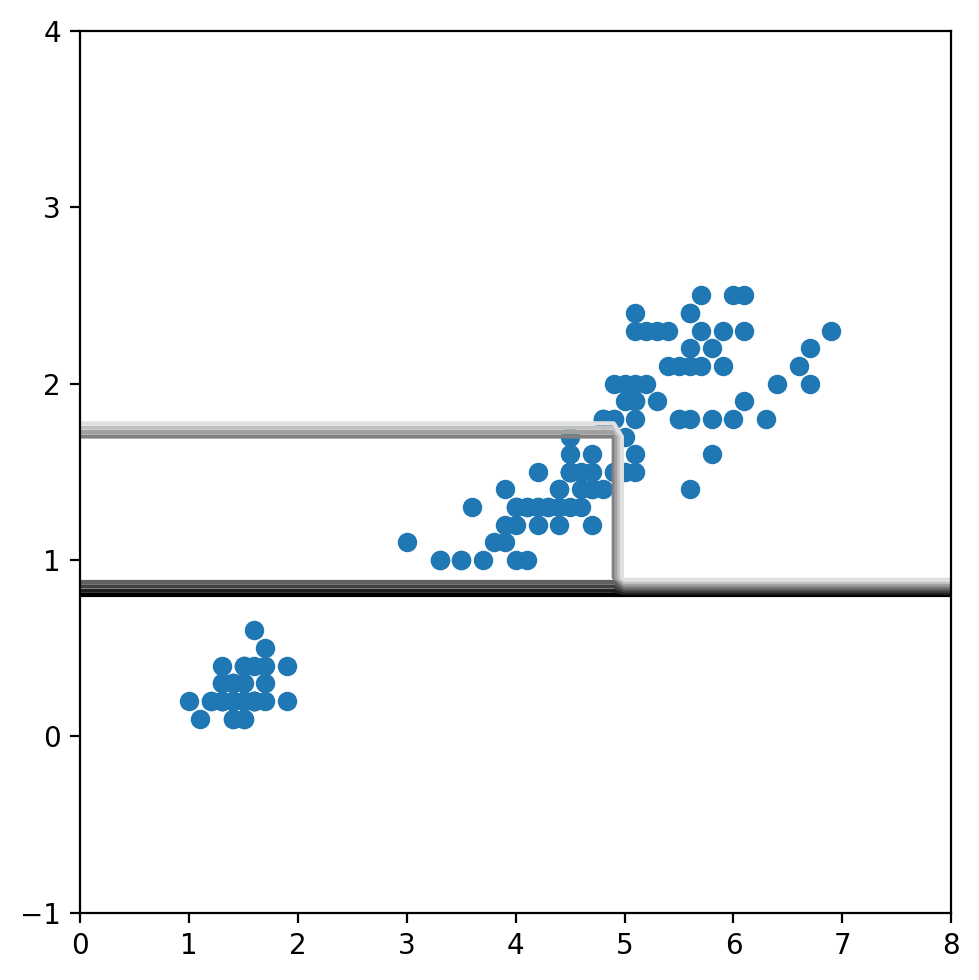

In [25]:
a

In [26]:
petal_only

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3
